In [3]:
import cv2;
import numpy as np;
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from scipy import stats
from scipy.stats import skew
from IPython.display import display

import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv2.__version__))

Python version 3.11.8 (main, Feb 12 2024, 14:50:05) [GCC 13.2.1 20230801] / OpenCV version 4.9.0 


Text(0.5, 1.0, 'Imagen desde la que se analiza el perfil de grises')

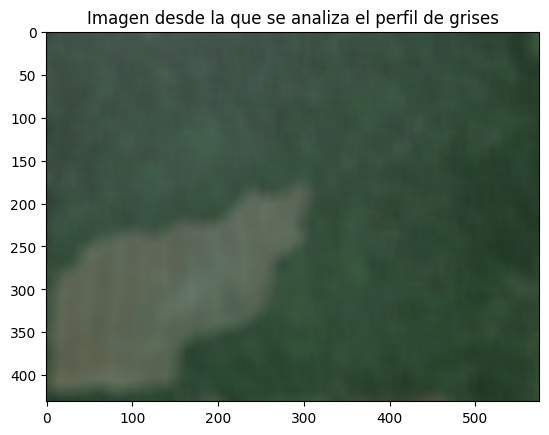

In [5]:
deforestacion_path = "images/Deforestacion.png"
rango = [[275,706],[155,730]]

deforestacion = cv2.imread(deforestacion_path)
deforestacion = cv2.cvtColor(deforestacion,cv2.COLOR_BGR2RGB)
def_roi = deforestacion[rango[0][0]:rango[0][1],rango[1][0]:rango[1][1]]
deforestacion_hsv = cv2.cvtColor(def_roi,cv2.COLOR_RGB2HSV)
deforestacion_hls = cv2.cvtColor(def_roi,cv2.COLOR_RGB2HLS)

kernel_size=20
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
kernel /= (kernel_size**2)

deforestacion_blur = cv2.filter2D(def_roi,-1,kernel,borderType=cv2.BORDER_REPLICATE)
deforestacion_blur_hsv = cv2.cvtColor(deforestacion_blur,cv2.COLOR_RGB2HSV)
deforestacion_blur_hls = cv2.cvtColor(deforestacion_blur,cv2.COLOR_RGB2HLS)

fix_line = 300
plt.figure()
plt.imshow(deforestacion_blur)
plt.title("Imagen desde la que se analiza el perfil de grises")

In [19]:
def detectar_zona(imagen):
    lookUpTable = np.zeros((1,256), np.uint8)
    for i in range(83,256):
        lookUpTable[0,i] = 255
    
    imagen_mask = cv2.LUT(imagen,lookUpTable)
    return imagen_mask

(431, 575)


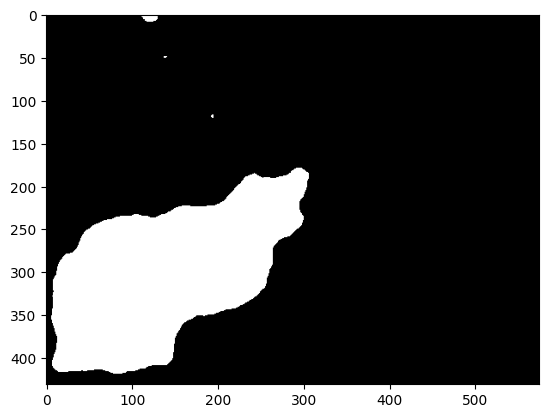

In [29]:

mask = detectar_zona(deforestacion_blur_hls)
mask_def = cv2.cvtColor(mask,cv2.COLOR_HLS2RGB)
mask_def = cv2.cvtColor(mask,cv2.COLOR_RGB2GRAY)

print(mask_def.shape)

plt.figure()
plt.imshow(mask_def,cmap='gray')
plt.show()

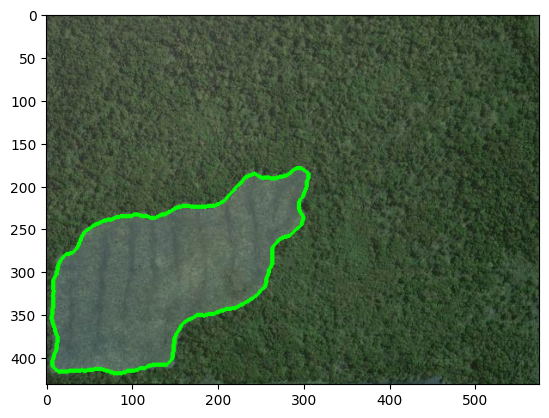

In [43]:
deforestacion = cv2.imread(deforestacion_path)
contours, _ = cv2.findContours(mask_def, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def_con = cv2.drawContours(deforestacion[rango[0][0]:rango[0][1],rango[1][0]:rango[1][1]], contours, 0, (0,255,0), 3)
plt.figure()
plt.imshow(def_con)
plt.show()